In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats

import database_queries.database_query as dq

from database_session.database_session import GetDatabaseSession

## Get Data

In [2]:
DATABASE_PATH = "../database/hockey_v16_test.db"

In [ ]:
db_session = GetDatabaseSession(db_path=DATABASE_PATH)
db_session.set_up_connection()
query_o = dq.DbDataGetter(db_session=db_session.session)
data = query_o.get_db_query_result(
    query_name="draft_data", query_file_path="C://Users//jziac//OneDrive//Documents//programovani//projekty//elite//data//other//queries.json"
    )
df = pd.DataFrame(data, columns=[
    'player_id', 'player_name', 'nationality', 'regular_season', 'team_id', 'team_name', 'season', 'games_played', 'g', 'a', 'tp', 'plus_minus', 'draft_position', 'draft_round', 'draft_year', 'uid'])
df = df.rename(columns={"uid": "league"})
df = df.drop_duplicates(subset=['player_id', 'player_name', 'league', 'regular_season', 'team_id', 'team_name', 'season', 'games_played', 'g', 'a', 'tp', 'plus_minus'])

INFO: New scrapping session started
INFO: New DB session initiated with db at ../database/hockey_v16_test.db


In [8]:
df

,player_id,player_name,nationality,regular_season,team_id,team_name,season,games_played,g,a,tp,plus_minus,draft_position,draft_round,draft_year,league
0,31219,Ryan Pilon,Canada,True,23614,None,2009-2010,16.0,4.0,9.0,13.0,NaN,147,5,2015,saahl-u15
1,31219,Ryan Pilon,Canada,True,23614,None,2010-2011,21.0,28.0,20.0,48.0,NaN,147,5,2015,saahl-u15
2,31219,Ryan Pilon,Canada,False,10568,None,2011-2012,2.0,0.0,1.0,1.0,NaN,147,5,2015,smaaahl
3,31219,Ryan Pilon,Canada,True,10568,None,2011-2012,32.0,8.0,16.0,24.0,NaN,147,5,2015,smaaahl
4,31219,Ryan Pilon,Canada,True,7519,Lethbridge Hurricanes,2011-2012,2.0,0.0,0.0,0.0,-4.0,147,5,2015,whl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209725,34449,Cam Allison,Canada,True,11326,None,1970-1971,NaN,NaN,NaN,NaN,NaN,20,4,1963,mshl
209726,34449,Cam Allison,Canada,True,2884,None,1971-1972,NaN,NaN,NaN,NaN,NaN,20,4,1963,cchl-sr
209727,34449,Cam Allison,Canada,True,3046,None,1972-1973,3.0,0.0,3.0,3.0,NaN,20,4,1963,ihl
209728,34449,Cam Allison,Canada,True,9493,None,1973-1974,NaN,NaN,NaN,NaN,NaN,20,4,1963,semhl


## Preprocess Data

In [79]:
#sum games in case player plays for more teams in one season
player_stats = df.groupby(['player_id', 'player_name', 'season', 'league'], as_index=False)[["games_played","g", "a", "tp", "plus_minus"]].sum()
draft_info = df[['player_id', 'player_name', 'draft_position', 'draft_round', 'draft_year']].drop_duplicates()
player_stats = pd.merge(player_stats, draft_info, on='player_id')
player_stats.sort_values(by='tp', ascending=False)

player_stats_overall_nhl = df[df['league']=='nhl'].groupby(['player_id', 'player_name'], as_index=False)[["games_played","g", "a", "tp", "plus_minus"]].sum()
player_stats_overall_nhl = pd.merge(player_stats_overall_nhl, draft_info, on='player_id')

In [80]:
player_stats_overall_nhl

,player_id,player_name_x,games_played,g,a,tp,plus_minus,player_name_y,draft_position,draft_round,draft_year
0,4,Matt Carkner,251.0,5.0,25.0,30.0,-11.0,Matt Carkner,58,2,1999
1,5,Ryan Potulny,126.0,22.0,27.0,49.0,-18.0,Ryan Potulny,87,3,2003
2,6,Chris Thorburn,805.0,53.0,81.0,134.0,-40.0,Chris Thorburn,50,2,2001
3,7,Valtteri Filppula,1222.0,222.0,394.0,616.0,0.0,Valtteri Filppula,95,3,2002
4,3809,Mark Recchi,1941.0,672.0,1117.0,1789.0,32.0,Mark Recchi,67,4,1988
...,...,...,...,...,...,...,...,...,...,...,...
2131,31343,Jett Luchanko,4.0,0.0,0.0,0.0,-3.0,Jett Luchanko,13,1,2024
2132,31344,Gabe Perreault,5.0,0.0,0.0,0.0,-1.0,Gabe Perreault,23,1,2023
2133,31346,Samuel Honzek,5.0,0.0,0.0,0.0,-1.0,Samuel Honzek,16,1,2023
2134,31347,Nikita Prishchepov,10.0,0.0,0.0,0.0,0.0,Nikita Prishchepov,217,7,2024


In [11]:
active_players = df.loc[df['season']=='2023-2024', 'player_id'].to_list()
non_active_players = list(set(df['player_id'].to_list()) - set(active_players))

## Analysis

### Number of rounds by year

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


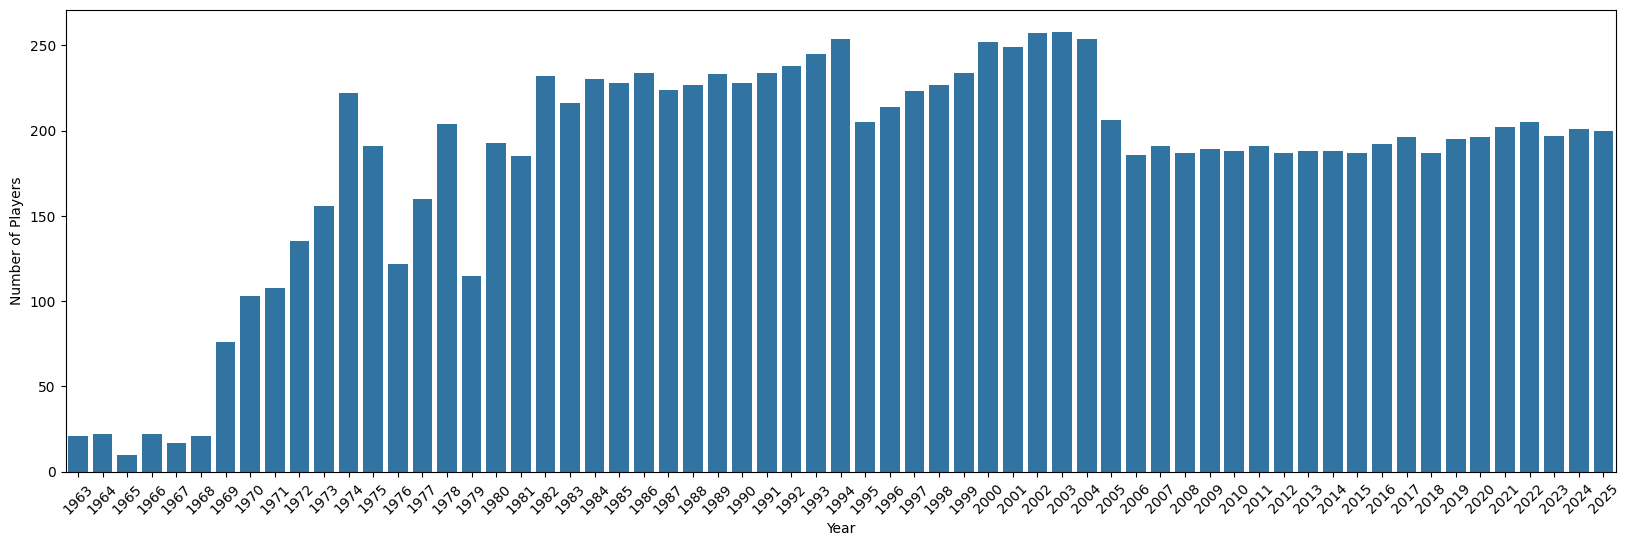

In [24]:
plt.figure(figsize=(20, 6)) 
sns.barplot(
    df[['draft_year', 'player_id']].groupby('draft_year').nunique().reset_index(), 
    x="draft_year", y="player_id"
    )
plt.xticks(rotation=45) 
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.show()

### Nationalities through years

In [51]:
df_copy = df.copy()
OTHER_COUNTRY = [
    'Austria', 'Slovenia', 'Belarus',  'Denmark',
    'Kazakhstan', 'Lithuania', 'China', 'Ukraine', 
    'Latvia', 'Norway', 'Croatia', 'Netherlands', 'Italy', 'Australia',
    'France', 'Poland', 'New Zealand', 'Hungary', 'Scotland', 'Japan',
    'Spain', 'England'
    ]
df_copy['nationality'] = df_copy['nationality'].replace(OTHER_COUNTRY, "Other")
yearly_country_counts = df_copy.drop_duplicates(subset=["draft_year", "player_id"]).value_counts(subset=["draft_year", "nationality"])
yearly_counts = df_copy.drop_duplicates(subset=["draft_year", "player_id"]).groupby(["draft_year"]).size().reset_index(name="count")
shares = pd.merge(yearly_country_counts.reset_index(), yearly_counts, on=["draft_year"], how="left")
shares["share"] = shares["count_x"] /shares["count_y"]
shares = shares.drop(columns=['count_x', 'count_y'])


#### Shares

<Axes: xlabel='draft_year'>

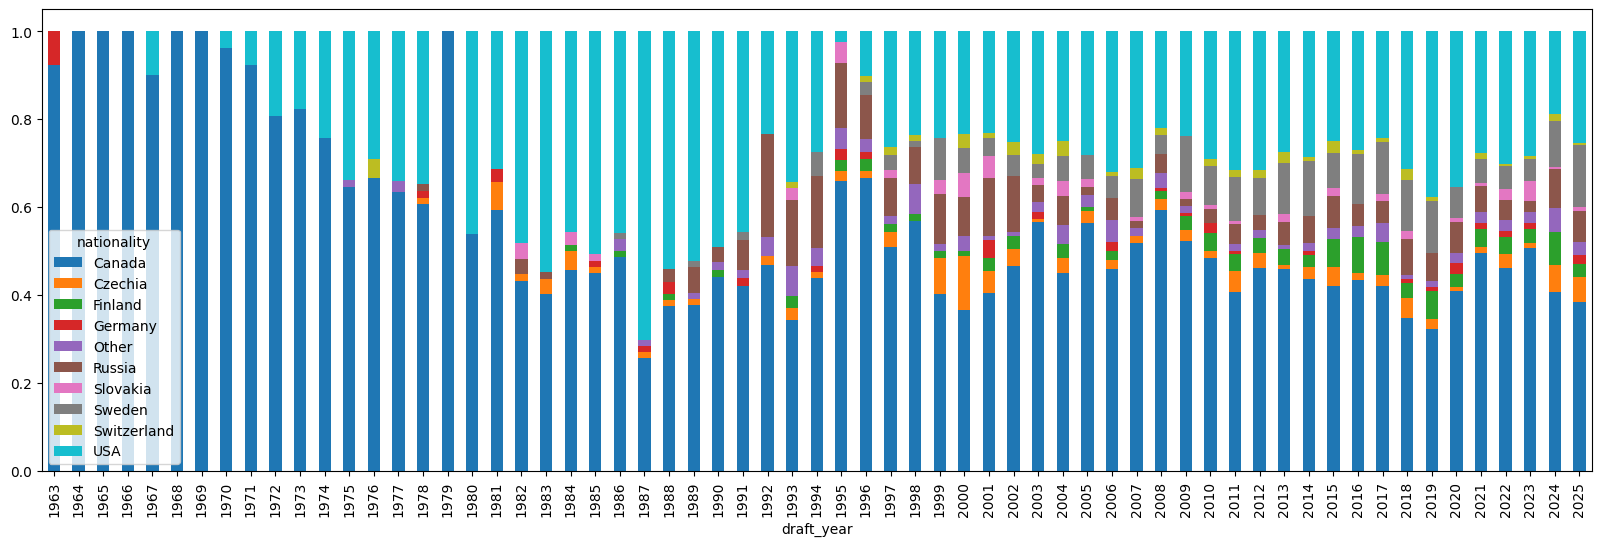

In [ ]:
shares.set_index(['draft_year', 'nationality'])['share'].unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(20, 6))

#### Shares - Last 10 Years 

<Axes: xlabel='draft_year'>

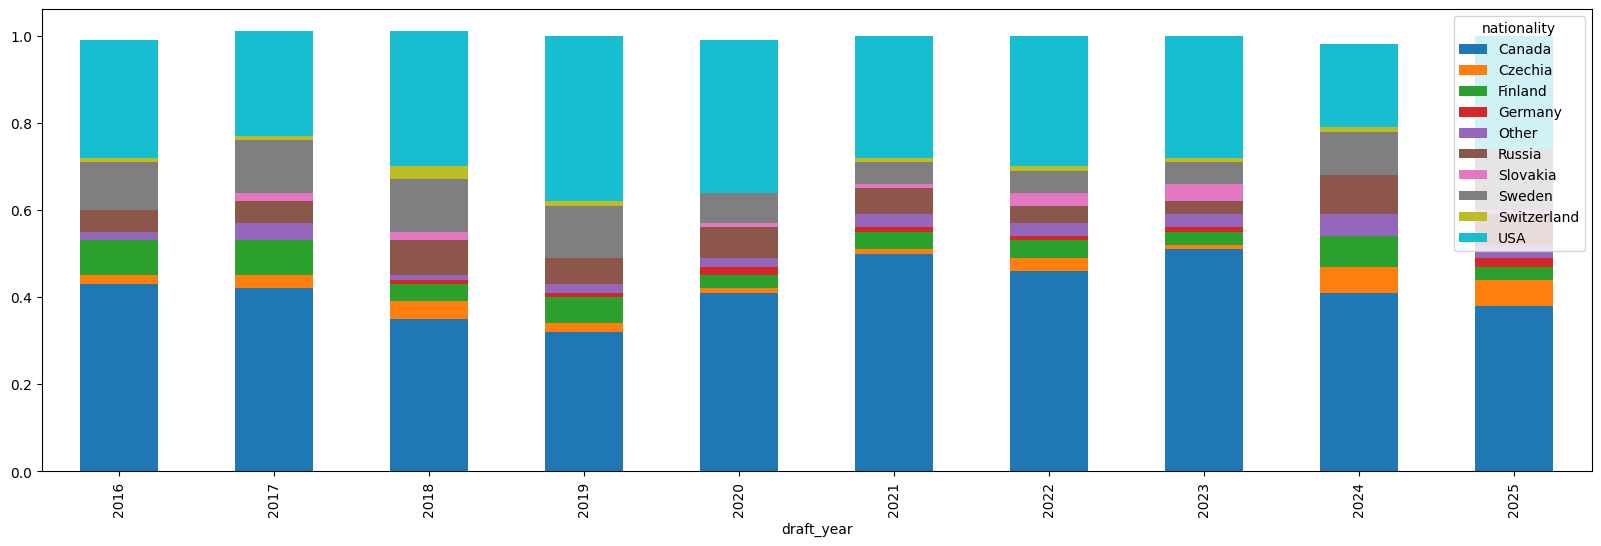

In [76]:
shares[shares["draft_year"] > 2015].set_index(['draft_year', 'nationality'])['share'].unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(20, 6))

In [77]:
shares["share percent"] = shares["share"].round(4) * 100
shares[shares["draft_year"] > 2015].set_index(['draft_year', 'nationality'])['share percent'].unstack(fill_value=0)

nationality,Canada,Czechia,Finland,Germany,Other,Russia,Slovakia,Sweden,Switzerland,USA
draft_year,,,,,,,,,,
2016,43.0,2.0,8.0,0.0,2.0,5.0,0.0,11.0,1.0,27.0
2017,42.0,3.0,8.0,0.0,4.0,5.0,2.0,12.0,1.0,24.0
2018,35.0,4.0,4.0,1.0,1.0,8.0,2.0,12.0,3.0,31.0
2019,32.0,2.0,6.0,1.0,2.0,6.0,0.0,12.0,1.0,38.0
2020,41.0,1.0,3.0,2.0,2.0,7.0,1.0,7.0,0.0,35.0
2021,50.0,1.0,4.0,1.0,3.0,6.0,1.0,5.0,1.0,28.0
2022,46.0,3.0,4.0,1.0,3.0,4.0,3.0,5.0,1.0,30.0
2023,51.0,1.0,3.0,1.0,3.0,3.0,4.0,5.0,1.0,28.0
2024,41.0,6.0,7.0,0.0,5.0,9.0,0.0,10.0,1.0,19.0


#### Counts

In [57]:
yearly_country_counts

draft_year  nationality
2024        Canada         82
2023        Canada         80
2025        Canada         77
2021        Canada         75
2003        Canada         73
                           ..
2020        Czechia         1
            Slovakia        1
2021        Slovakia        1
2025        Switzerland     1
1963        Germany         1
Name: count, Length: 389, dtype: int64

In [56]:
yearly_country_counts.unstack(fill_value=0)

nationality,Canada,Czechia,Finland,Germany,Other,Russia,Slovakia,Sweden,Switzerland,USA
draft_year,,,,,,,,,,
1963,12,0,0,1,0,0,0,0,0,0
1964,13,0,0,0,0,0,0,0,0,0
1965,7,0,0,0,0,0,0,0,0,0
1966,6,0,0,0,0,0,0,0,0,0
1967,9,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2021,75,2,6,2,4,9,1,8,2,42
2022,72,5,6,2,4,7,4,8,1,47
2023,80,2,5,2,4,4,7,8,1,45


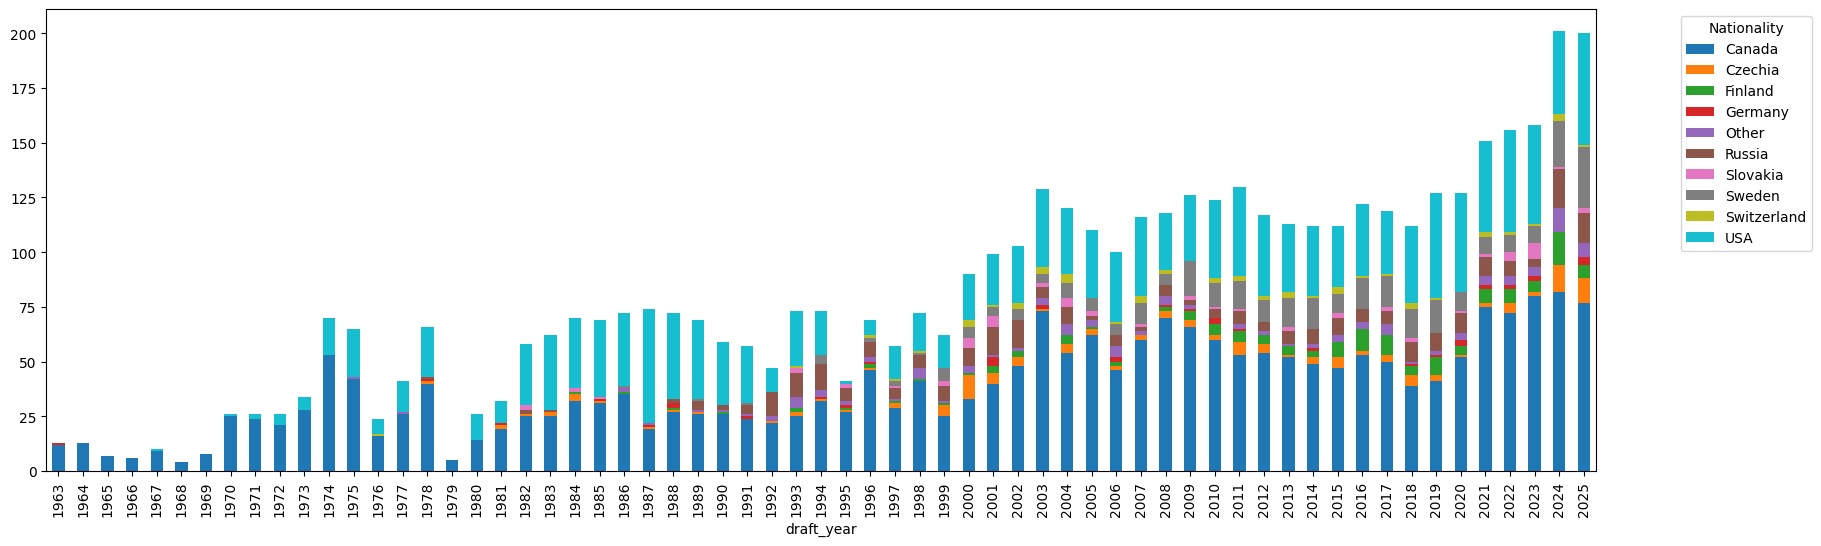

In [ ]:
yearly_country_counts.unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(20, 6))
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc='upper left')

In [19]:
player_stats_overall[['draft_round', 'player_id']].groupby(['draft_round']).nunique()

,player_id
draft_round,
1,1230
2,920
3,663
4,542
5,415
6,373
7,304
8,182
9,161


### Average Career Matches Played Based Round Drafted

In [78]:
player_stats_overall
draft_mean_games = player_stats_overall[filter_draft].groupby("draft_round").agg(
    games_played=("games_played", "median")).reset_index()
sns.barplot(draft_mean_games, x="draft_round", y="games_played")

NameError: name 'player_stats_overall' is not defined

## Does Difference between Rounds Drafted with exception of First Round matter?

## Average Career Matches Played Based on Position Drafted

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='draft_position', ylabel='games_played'>

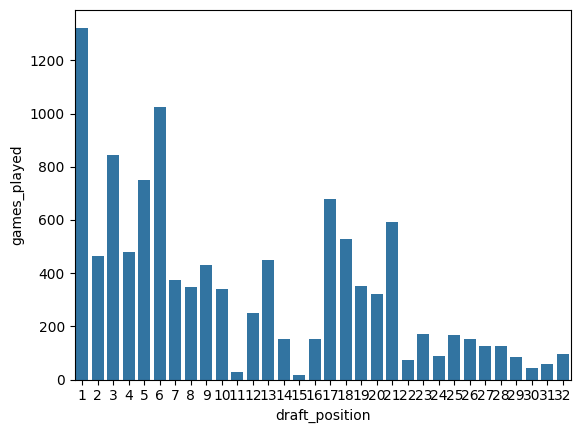

In [ ]:
draft_mean_games = player_stats_overall[(filter_draft)&(player_stats_overall['draft_position'] <=32)].groupby("draft_position").agg(
    games_played=("games_played", "median")).reset_index()
sns.barplot(draft_mean_games, x="draft_position", y="games_played")